In [3]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from textblob import TextBlob

import nltk
nltk.download('vader_lexicon')
nltk.download('sentiwordnet')
nltk.download('wordnet')
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


df=pd.read_csv('tweets.csv')
df

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\manal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\manal\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [4]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Cleaning process
df['cleaned_tweet'] = df['tweet'].str.lower()  # Convert to lowercase
df['cleaned_tweet'] = df['cleaned_tweet'].str.replace(r'@\w+', '', regex=True)  # Remove mentions
df['cleaned_tweet'] = df['cleaned_tweet'].str.replace(r'http\S+|www\S+', '', regex=True)  # Remove URLs
df['cleaned_tweet'] = df['cleaned_tweet'].str.replace(r'[^a-zA-Z\s]', '', regex=True)  # Remove special characters and numbers @ #


nlp = spacy.load("en_core_web_sm")

def clean_tweet_spacy(text):
    doc = nlp(text) #Process text with spaCy
    cleaned_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]  #Remove stopwords and punctuation, and lemmatize words
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text

abbreviation_dict = {
    "u": "you",
    "r": "are",
    "ur": "your",
    "b4": "before",
    "4": "for",
    "2": "to",
    "gr8": "great",
    "luv": "love",
    "y": "why",
    "b": "be",
    "c": "see",
    "m": "am",
    "w/": "with",
    "w/o": "without",
    "pls": "please",
    "ppl": "people",
    "thx": "thanks",
    "msg": "message",
    "omg": "oh my god"
}

def abbreviations(text):
    words = text.split()
    expanded_words = [abbreviation_dict[word] if word in abbreviation_dict else word for word in words]
    return " ".join(expanded_words)


df['cleaned_tweet'] = df['cleaned_tweet'].apply(clean_tweet_spacy)
df["cleaned_tweet"] = df["cleaned_tweet"].apply(abbreviations)

#df.to_csv("cleaned id and tweets.csv", index=False, encoding="utf-8")
df

,id,tweet,cleaned_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife require passion dedication ...
1,31964,@user #white #supremacists want everyone to s...,white supremacist want new bird movie here
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal acne altwaystoheal healthy healing
3,31966,is the hp and the cursed child book up for res...,hp cursed child book reservation yes harrypott...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd bihday amazing hilarious nephew eli ahmir u...
...,...,...,...
17192,49155,thought factory: left-right polarisation! #tru...,think factory leftright polarisation trump use...
17193,49156,feeling like a mermaid ð #hairflip #neverre...,feel like mermaid hairflip neverready formal w...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,hillary campaign today ohioomg amp word like a...
17195,49158,"happy, at work conference: right mindset leads...",happy work conference right mindset lead cultu...


In [5]:
# Initialize sentiment analyzers
sia = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    """Returns sentiment label using VADER."""
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

def textblob_sentiment(text):
    """Returns sentiment label using TextBlob."""
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

def sentiwordnet_sentiment(text):
    """Estimates sentiment using SentiWordNet (basic approach)."""
    words = text.split()
    pos_score = neg_score = 0
    for word in words:
        synsets = list(swn.senti_synsets(word))
        if synsets:
            pos_score += synsets[0].pos_score()
            neg_score += synsets[0].neg_score()
    if pos_score > neg_score:
        return 'Positive'
    elif neg_score > pos_score:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['vader_sentiment'] = df['cleaned_tweet'].astype(str).apply(vader_sentiment)
df['textblob_sentiment'] = df['cleaned_tweet'].astype(str).apply(textblob_sentiment)
df['sentiwordnet_sentiment'] = df['cleaned_tweet'].astype(str).apply(sentiwordnet_sentiment)

#df.head()
df

,id,tweet,cleaned_tweet,vader_sentiment,textblob_sentiment,sentiwordnet_sentiment
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife require passion dedication ...,Positive,Neutral,Positive
1,31964,@user #white #supremacists want everyone to s...,white supremacist want new bird movie here,Positive,Positive,Neutral
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal acne altwaystoheal healthy healing,Positive,Positive,Positive
3,31966,is the hp and the cursed child book up for res...,hp cursed child book reservation yes harrypott...,Positive,Positive,Positive
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd bihday amazing hilarious nephew eli ahmir u...,Positive,Positive,Positive
...,...,...,...,...,...,...
17192,49155,thought factory: left-right polarisation! #tru...,think factory leftright polarisation trump use...,Positive,Neutral,Positive
17193,49156,feeling like a mermaid ð #hairflip #neverre...,feel like mermaid hairflip neverready formal w...,Positive,Neutral,Positive
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,hillary campaign today ohioomg amp word like a...,Positive,Neutral,Positive
17195,49158,"happy, at work conference: right mindset leads...",happy work conference right mindset lead cultu...,Positive,Positive,Positive


          VADER  TextBlob  SentiWordNet
Negative   3499      2483          4283
Neutral    4727      6748          4190
Positive   8971      7966          8724


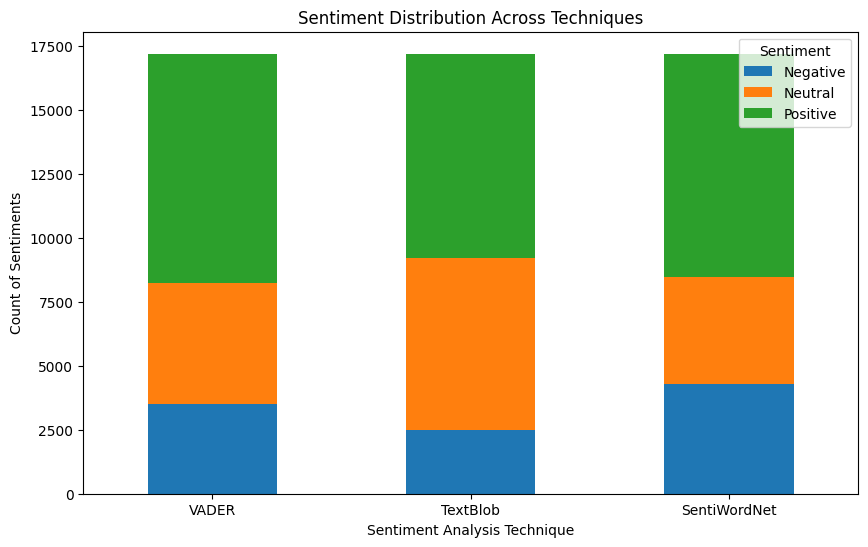

In [6]:
counts = pd.DataFrame({
    'VADER': df['vader_sentiment'].value_counts(),
    'TextBlob': df['textblob_sentiment'].value_counts(),
    'SentiWordNet': df['sentiwordnet_sentiment'].value_counts()
})

print(counts)
counts = counts.T  # Transpose to align categories as columns
counts.plot(kind='bar', stacked=True, figsize=(10,6))

plt.xlabel("Sentiment Analysis Technique")
plt.ylabel("Count of Sentiments")
plt.title("Sentiment Distribution Across Techniques")
plt.legend(title="Sentiment", loc="upper right")
plt.xticks(rotation=0)
plt.show()

In [7]:
fig = plt.figure(figsize=(15,8), dpi=1600)

#first row, first column
ax1 = plt.subplot2grid((1,3),(0,0))
df['vader_sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green', 'blue', 'red'])
plt.title("VADAR Sentiment Proportion")

#first row sec column
ax1 = plt.subplot2grid((1,3), (0, 1))
df['textblob_sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green', 'blue', 'red'])
plt.title("TextBlob Sentiment Proportion")

#first row third column
ax1 = plt.subplot2grid((1,3), (0, 2))
df['sentiwordnet_sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green', 'blue', 'red'])
plt.title("SentiWodNet Sentiment Proportion")

Text(0.5, 1.0, 'SentiWodNet Sentiment Proportion')

In [8]:
# Function to generate word cloud
def vadar(sentiment):
    text = " ".join(df[df['vader_sentiment'] == sentiment]['cleaned_tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(6,3))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - {sentiment} Sentiment")
    plt.show()

def textblob(sentiment):
    text = " ".join(df[df['textblob_sentiment'] == sentiment]['cleaned_tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(6,3))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - {sentiment} Sentiment")
    plt.show()

def sentiwordnet(sentiment):
    text = " ".join(df[df['sentiwordnet_sentiment'] == sentiment]['cleaned_tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(6,3))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - {sentiment} Sentiment")
    plt.show()

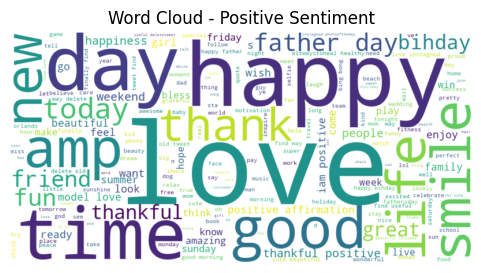

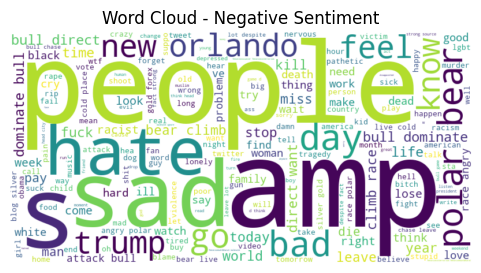

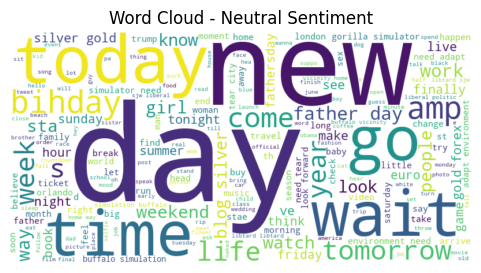

In [9]:
vadar('Positive')
vadar('Negative')
vadar('Neutral')

#textblob('Positive')
#textblob('Negative')
#textblob('Neutral')

#sentiwordnet('Positive')
#sentiwordnet('Negative')
#sentiwordnet('Neutral')

love      1627
day       1454
not       1342
happy      978
amp        827
good       717
you        666
time       664
am         659
life       626
today      564
new        562
people     513
get        512
like       501
dtype: int64


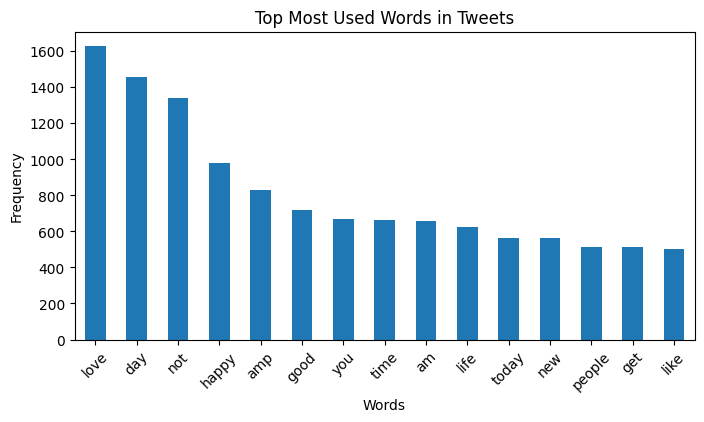

In [11]:
words = " ".join(df["cleaned_tweet"]).split()

# Convert to pandas Series and get the top 10
top = pd.Series(words).value_counts().head(15)
print(top)


plt.figure(figsize=(8, 4))
top.plot(kind="bar")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top Most Used Words in Tweets")
plt.xticks(rotation=45)
plt.show()